EOF
Top-1024,Sketch:128*256
Execution time:  10.400 seconds.
Precision:  0.851
Top_dict with 112432 bytes.
Sketch with 131200 bytes.
Sk_head with 31448 bytes.
hyperloglog with 4784 bytes.
Total size 273.3046875 kbytes, 
Find:871
Top_ARE: 0.0433
Top_AAE: 2.4948
Estimate time:  0.697 seconds.


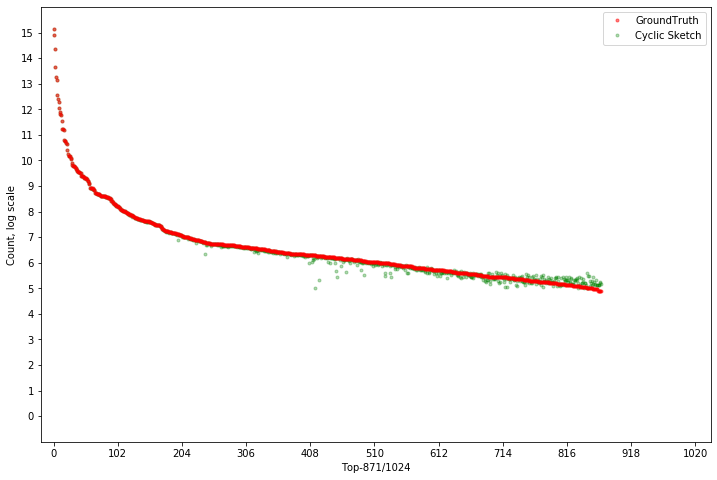

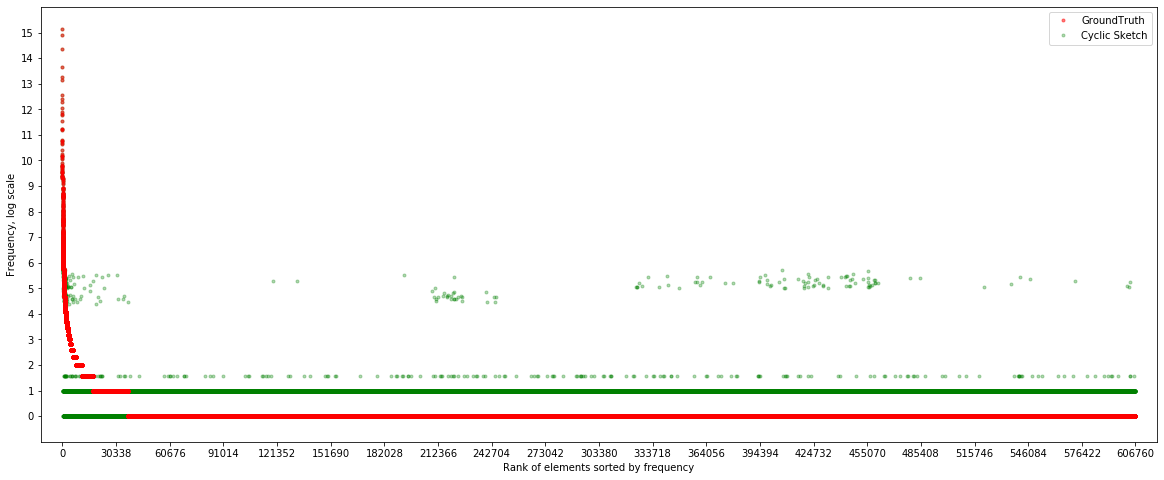

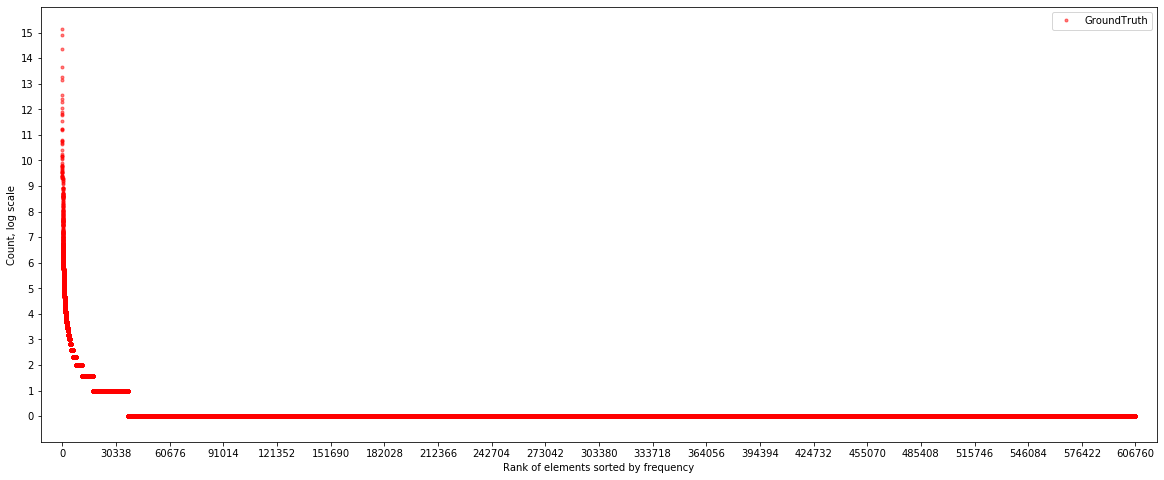

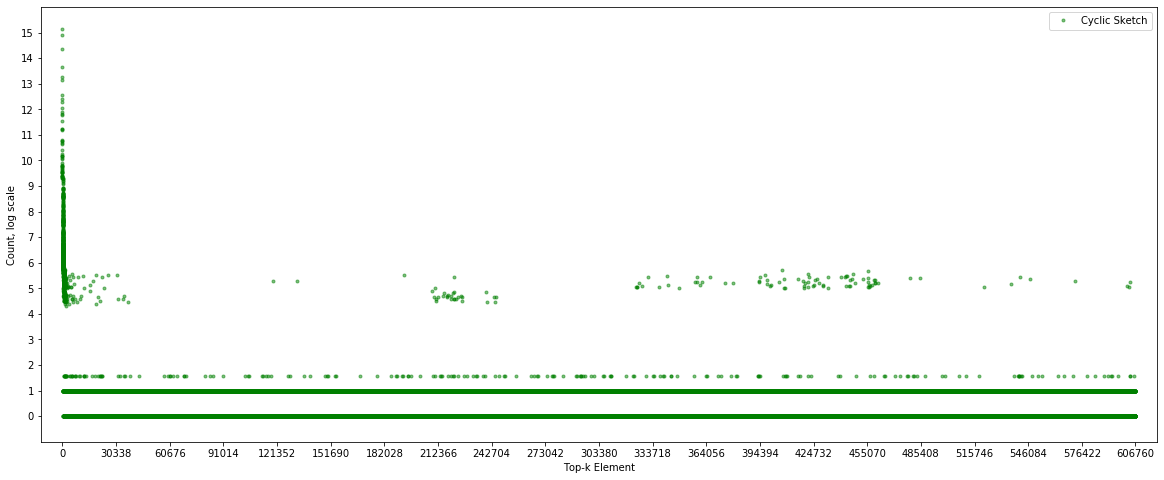

In [1]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-1280,Sketch:128*256
Execution time:  10.656 seconds.
Precision:  0.854
Top_dict with 134536 bytes.
Sketch with 131200 bytes.
Sk_head with 32440 bytes.
hyperloglog with 4784 bytes.
Total size 295.859375 kbytes, 
Find:875
Top_ARE: 0.0353
Top_AAE: 2.1109
Estimate time:  0.693 seconds.


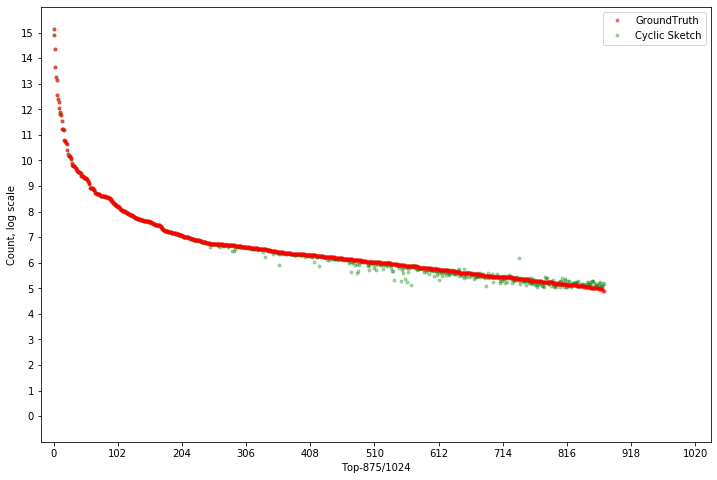

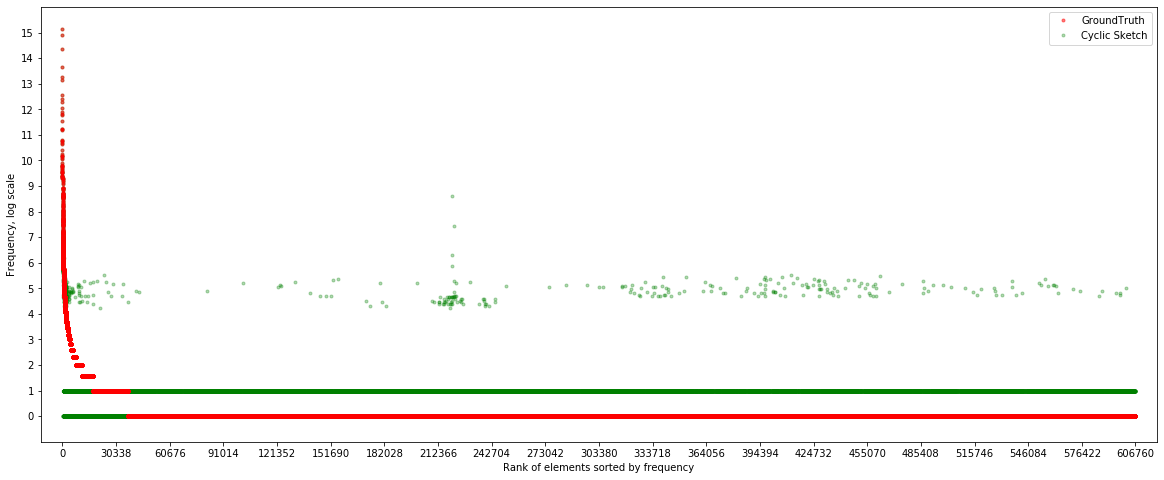

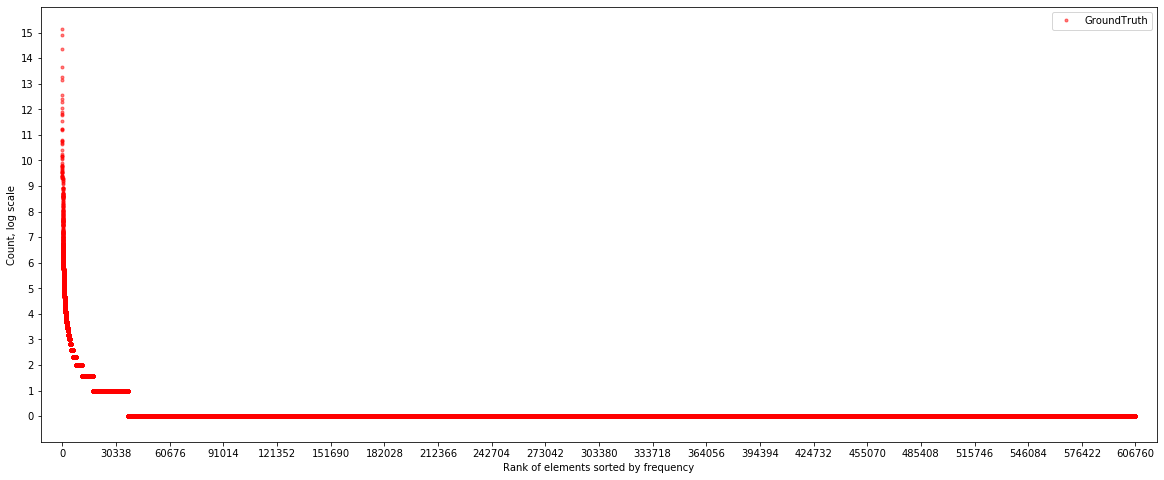

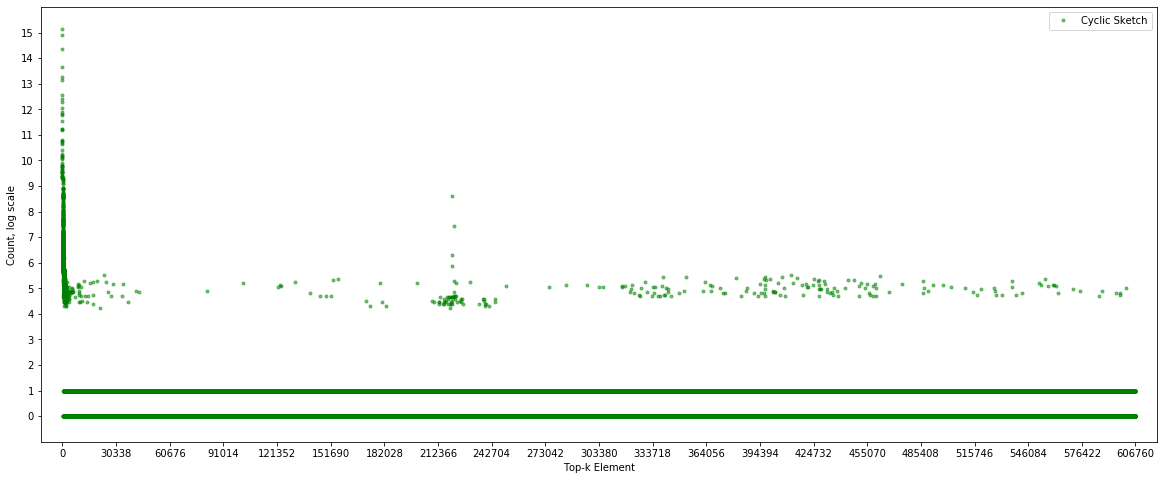

In [2]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=1280
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-2048,Sketch:128*256
Execution time:  11.676 seconds.
Precision:  0.907
Top_dict with 237280 bytes.
Sketch with 131200 bytes.
Sk_head with 33136 bytes.
hyperloglog with 4784 bytes.
Total size 396.875 kbytes, 
Find:929
Top_ARE: 0.0291
Top_AAE: 1.7029
Estimate time:  0.684 seconds.


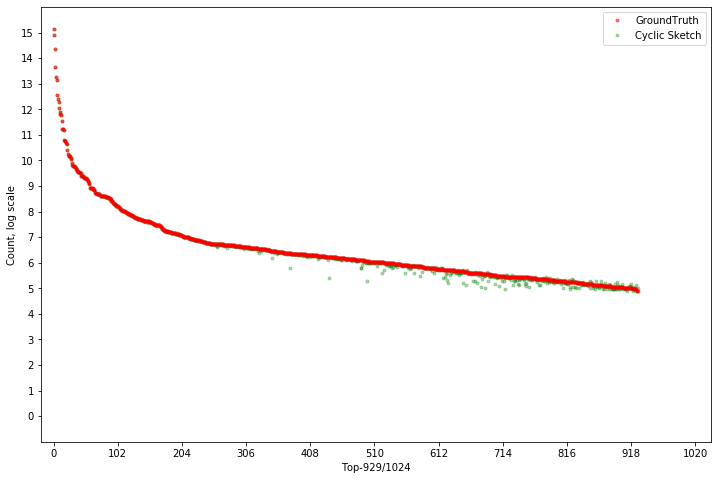

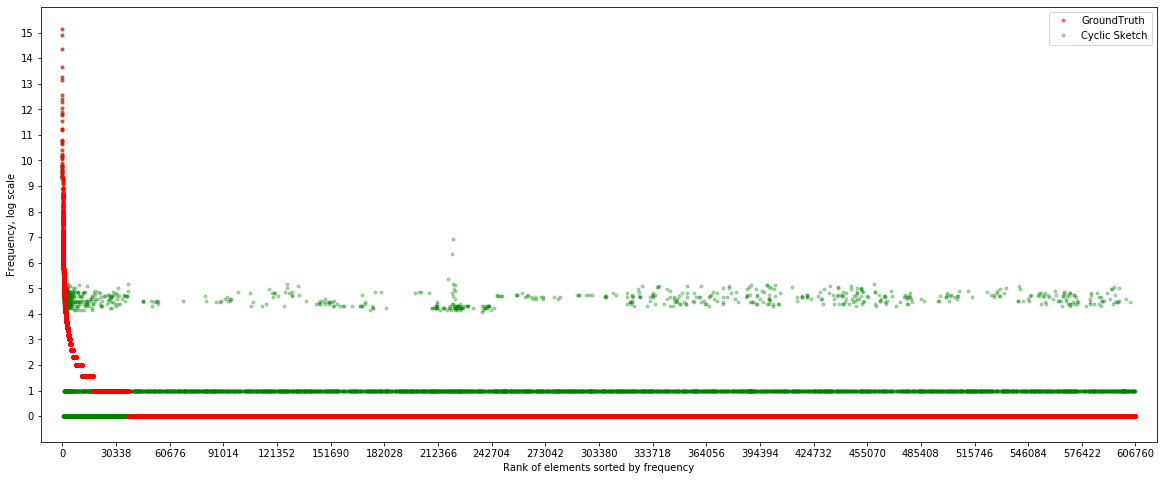

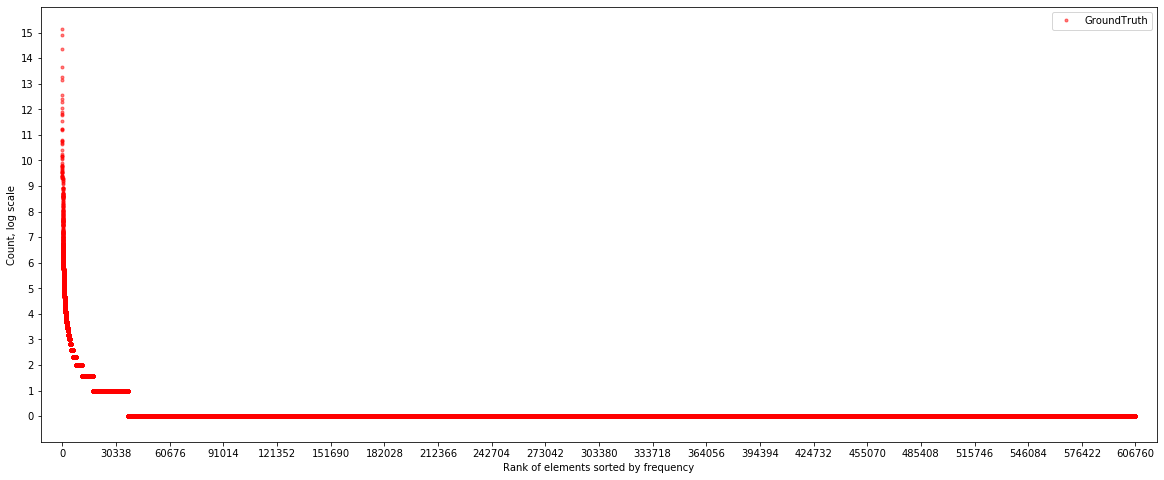

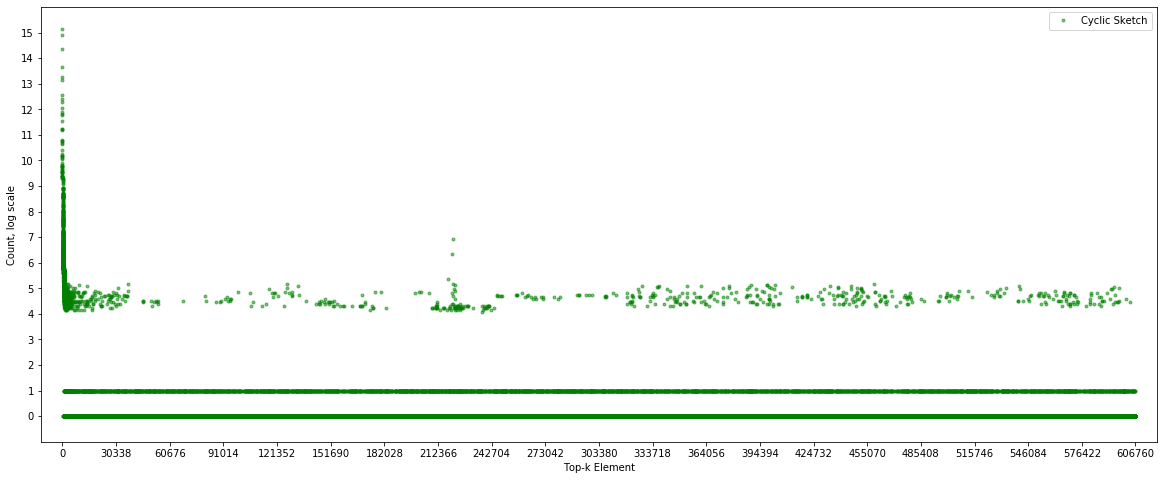

In [3]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=2048
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-2816,Sketch:128*256
Execution time:  13.418 seconds.
Precision:  0.918
Top_dict with 404616 bytes.
Sketch with 131200 bytes.
Sk_head with 32776 bytes.
hyperloglog with 4784 bytes.
Total size 559.9375 kbytes, 
Find:940
Top_ARE: 0.0261
Top_AAE: 1.4585
Estimate time:  0.663 seconds.


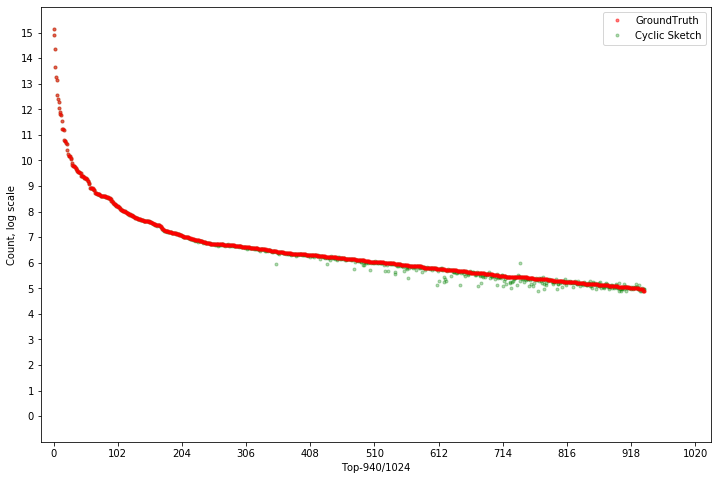

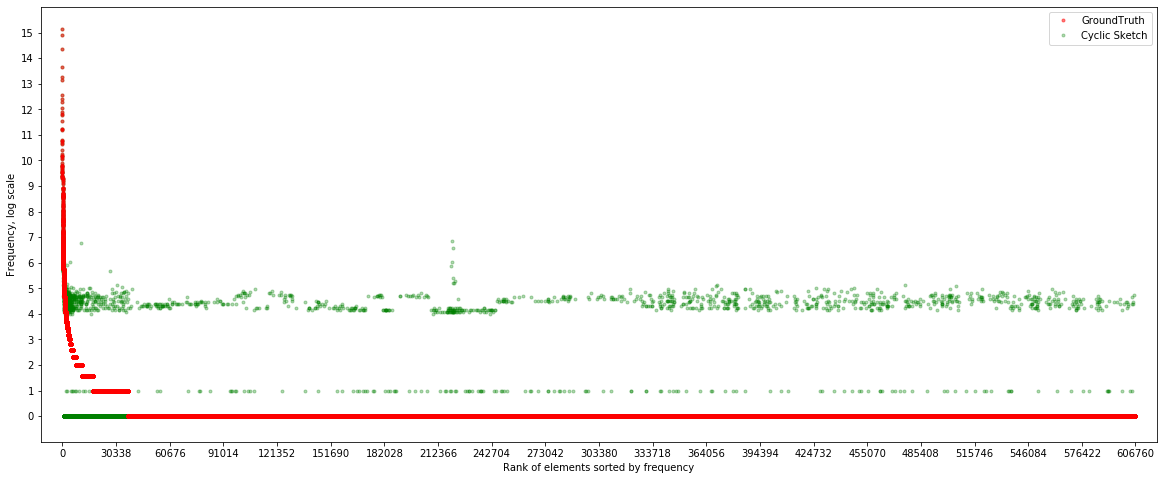

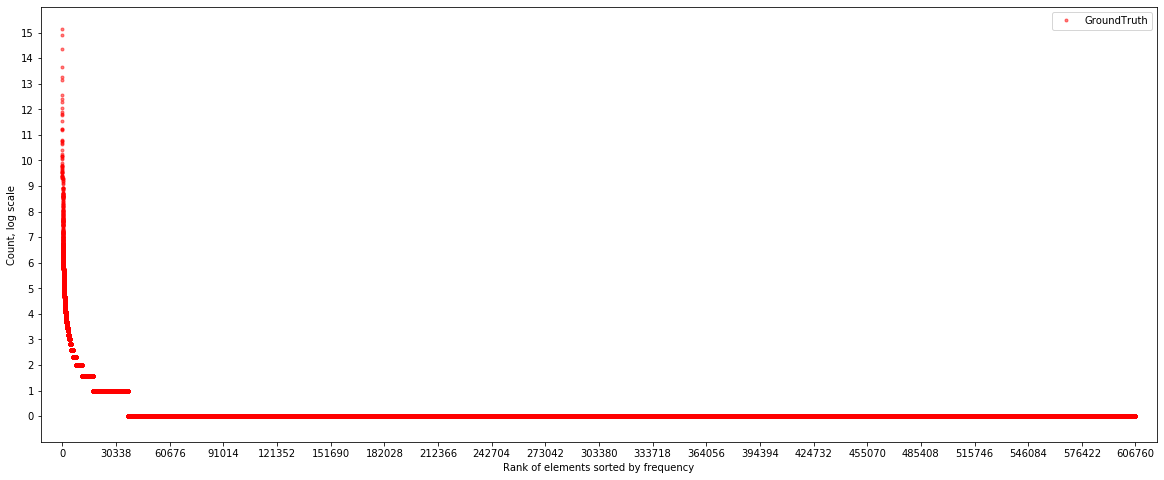

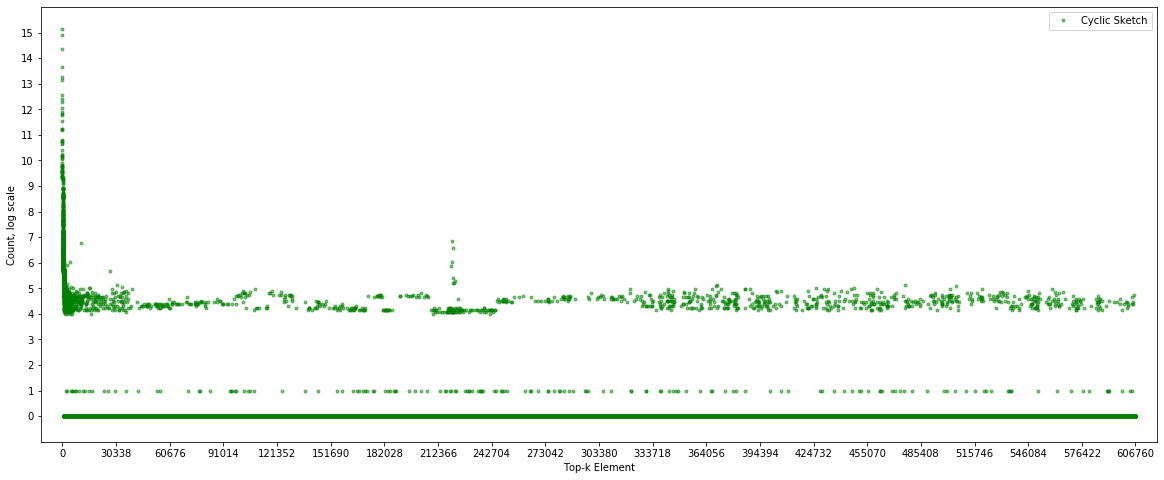

In [4]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=2816
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-3584,Sketch:128*256
Execution time:  15.678 seconds.
Precision:  0.942
Top_dict with 477848 bytes.
Sketch with 131200 bytes.
Sk_head with 32592 bytes.
hyperloglog with 4784 bytes.
Total size 631.2734375 kbytes, 
Find:965
Top_ARE: 0.0232
Top_AAE: 1.2539
Estimate time:  0.686 seconds.


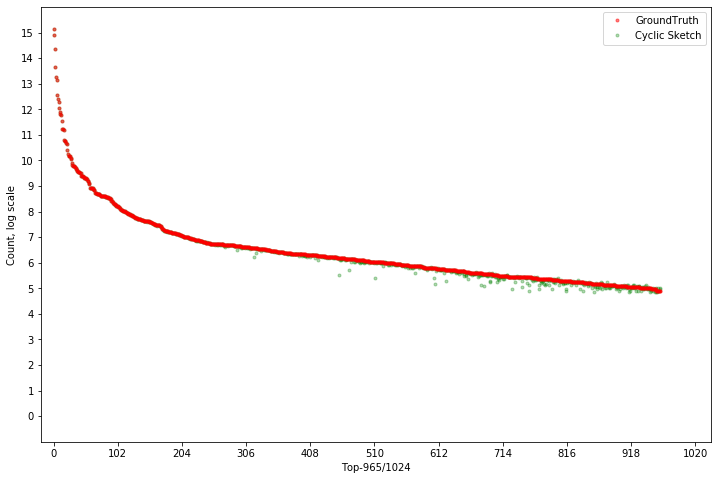

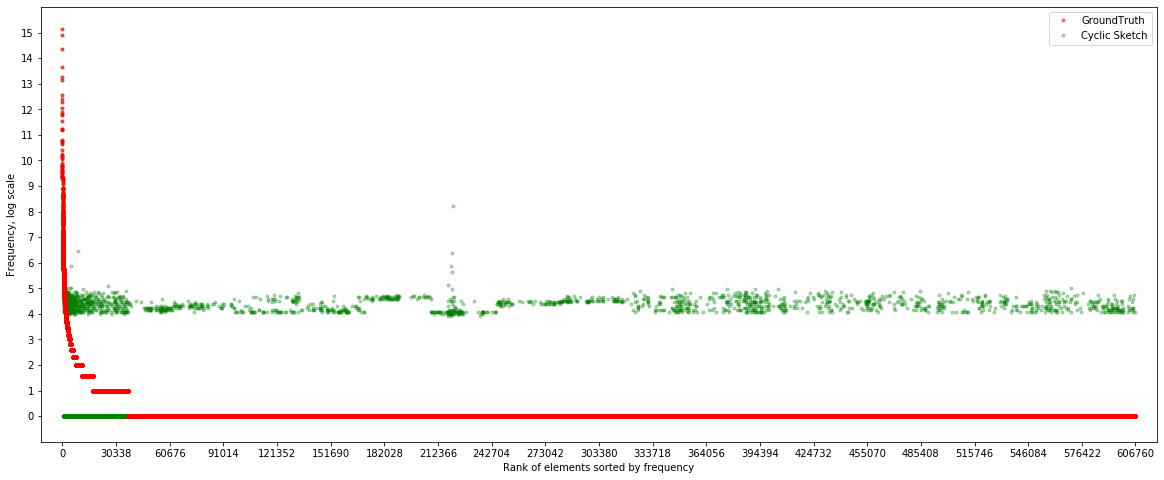

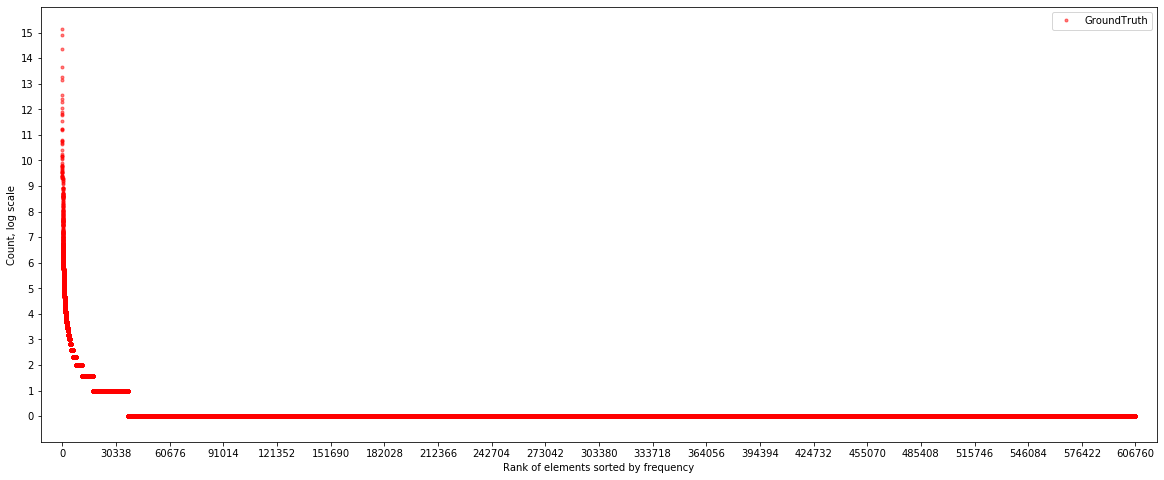

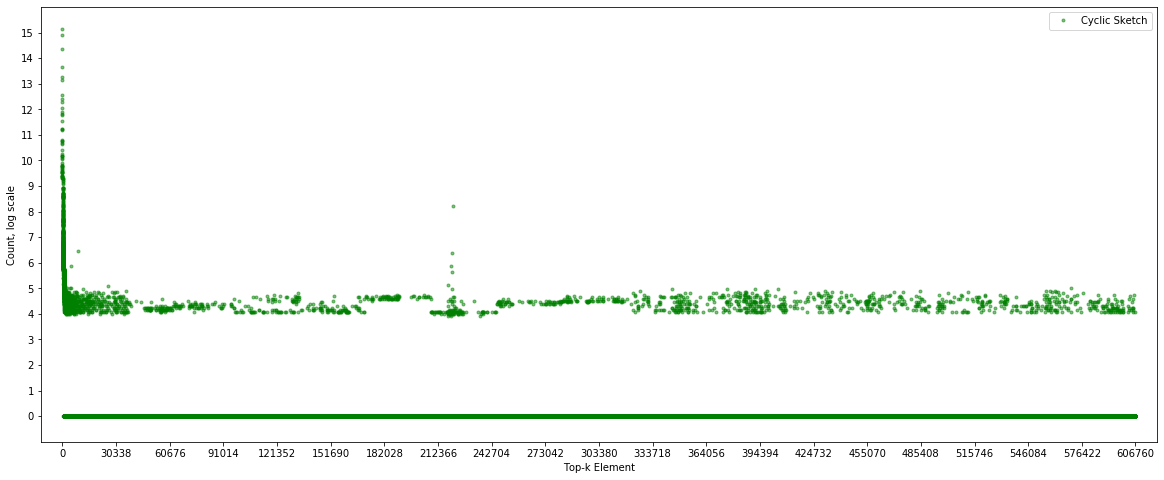

In [5]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=3584
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-4352,Sketch:128*256
Execution time:  18.823 seconds.
Precision:  0.942
Top_dict with 565744 bytes.
Sketch with 131200 bytes.
Sk_head with 33792 bytes.
hyperloglog with 4784 bytes.
Total size 718.28125 kbytes, 
Find:965
Top_ARE: 0.0180
Top_AAE: 0.9824
Estimate time:  0.684 seconds.


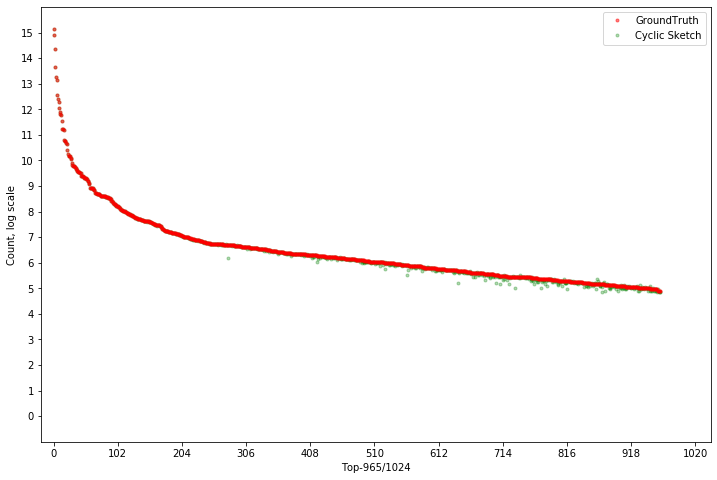

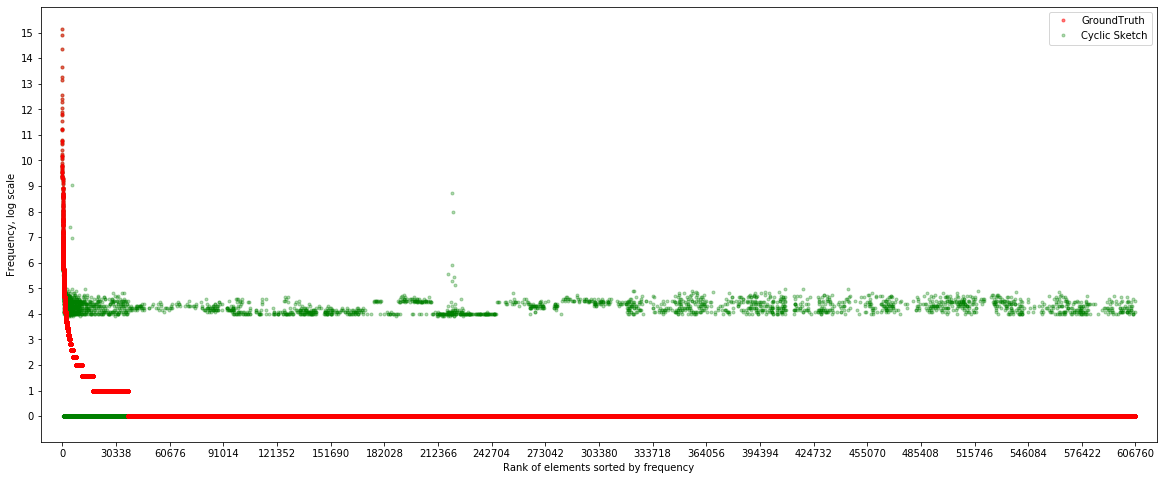

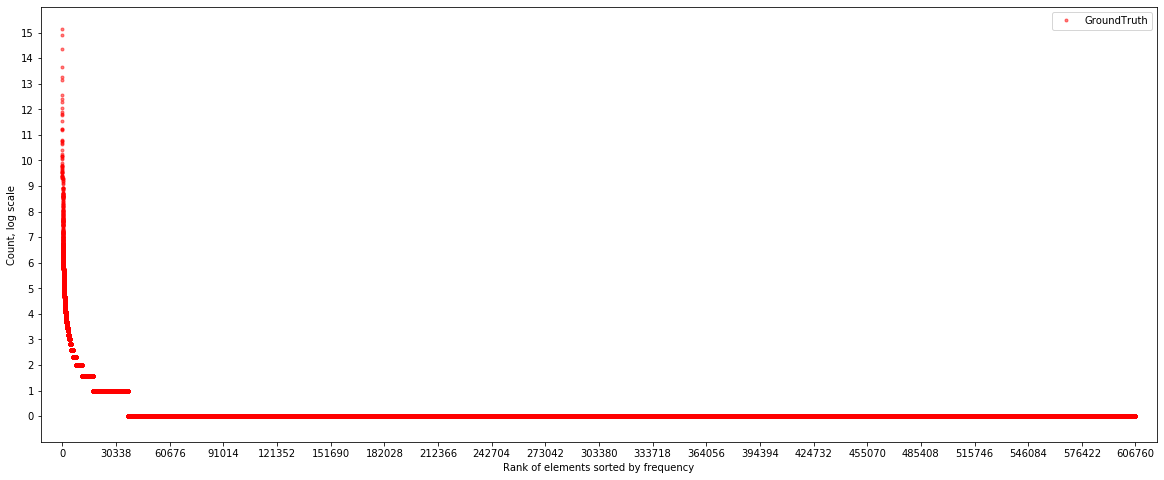

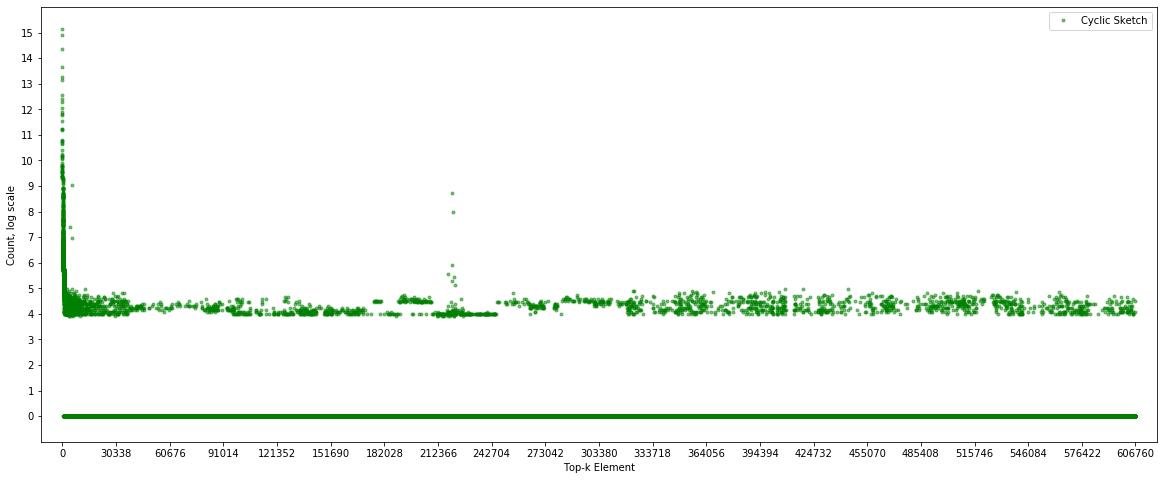

In [6]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=4352
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-5120,Sketch:128*256
Execution time:  22.245 seconds.
Precision:  0.957
Top_dict with 661936 bytes.
Sketch with 131200 bytes.
Sk_head with 34728 bytes.
hyperloglog with 4784 bytes.
Total size 813.1328125 kbytes, 
Find:980
Top_ARE: 0.0193
Top_AAE: 0.9980
Estimate time:  0.676 seconds.


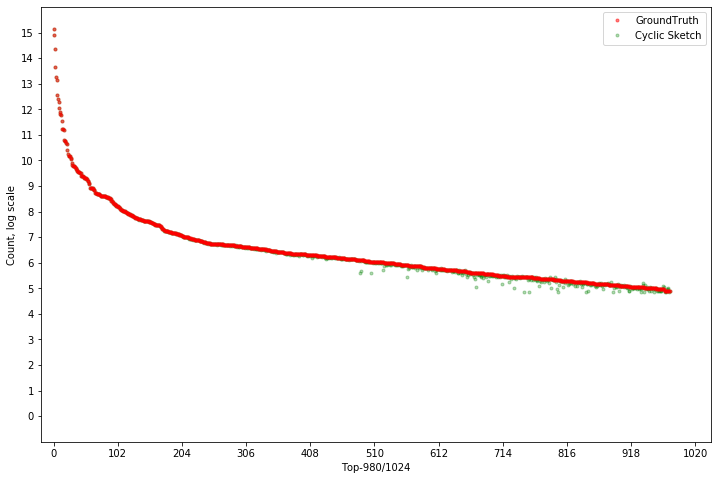

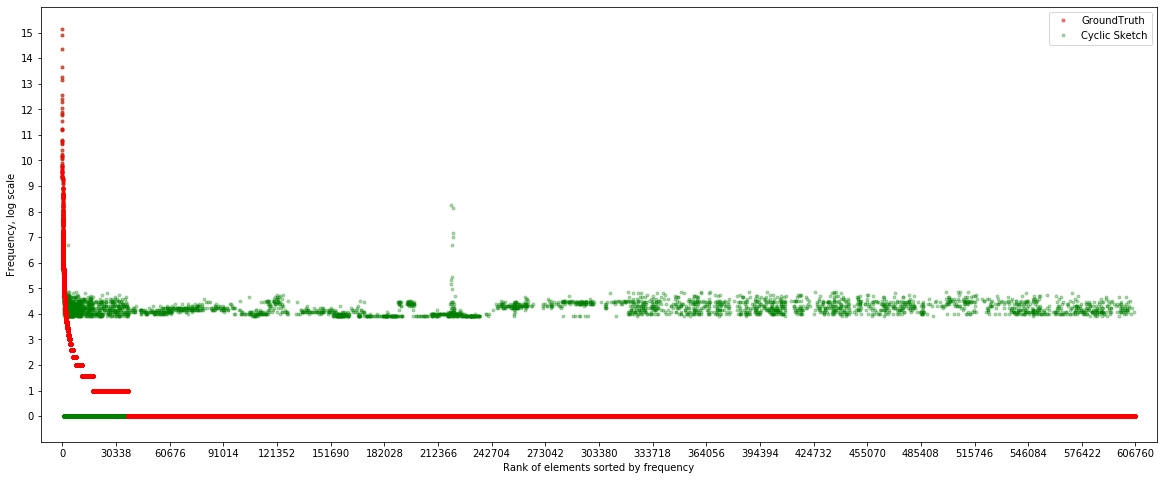

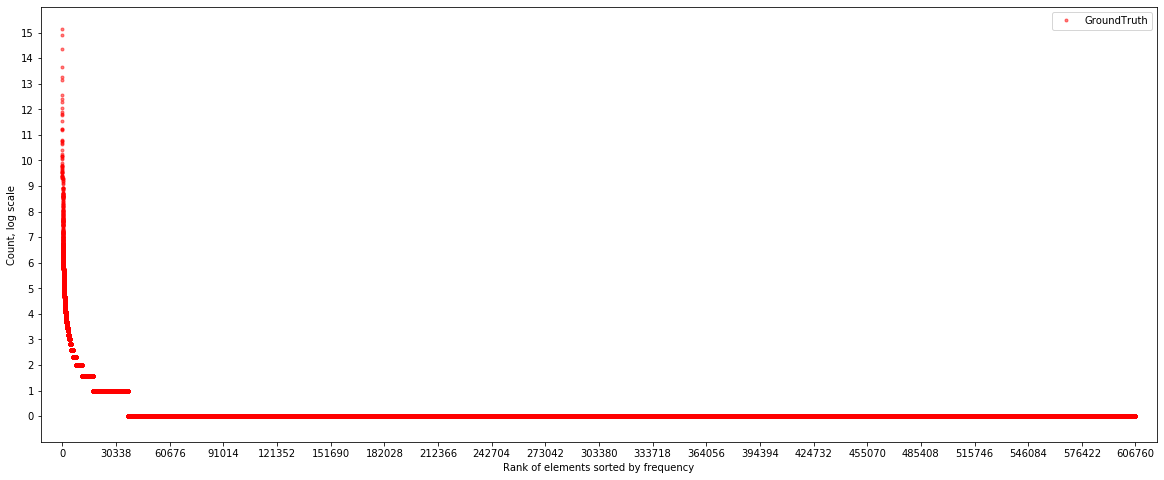

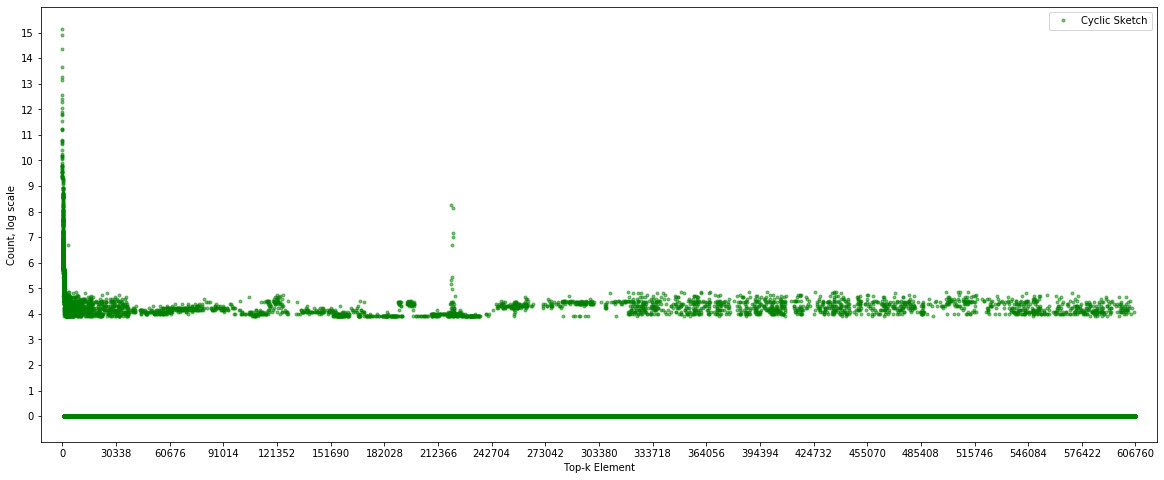

In [7]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=5120
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

EOF
Top-5888,Sketch:128*256
Execution time:  34.229 seconds.
Precision:  0.964
Top_dict with 897272 bytes.
Sketch with 131200 bytes.
Sk_head with 34584 bytes.
hyperloglog with 4784 bytes.
Total size 1042.8125 kbytes, 
Find:987
Top_ARE: 0.0168
Top_AAE: 0.8561
Estimate time:  0.845 seconds.


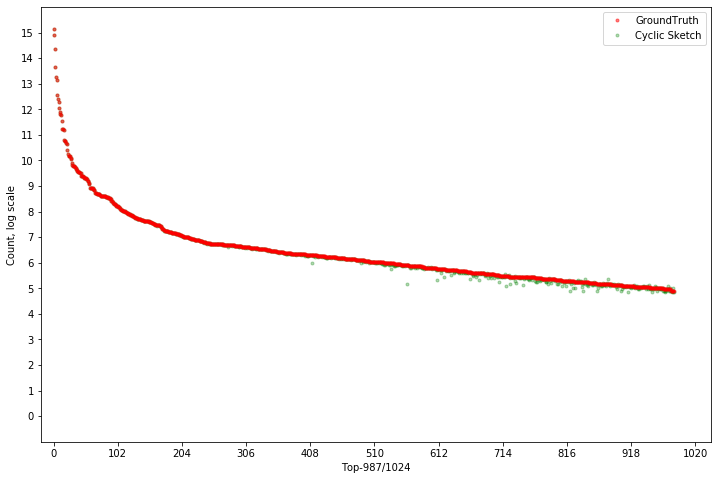

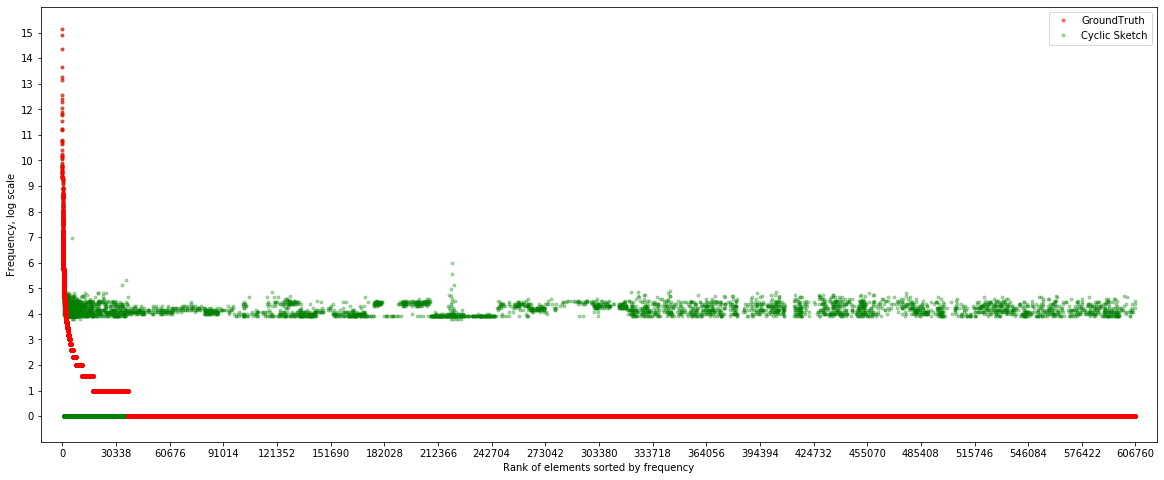

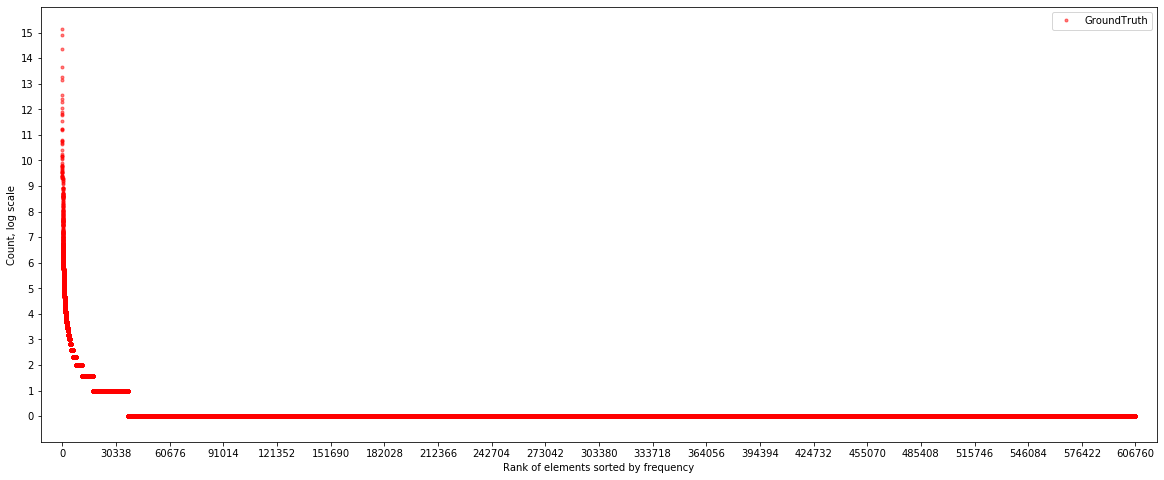

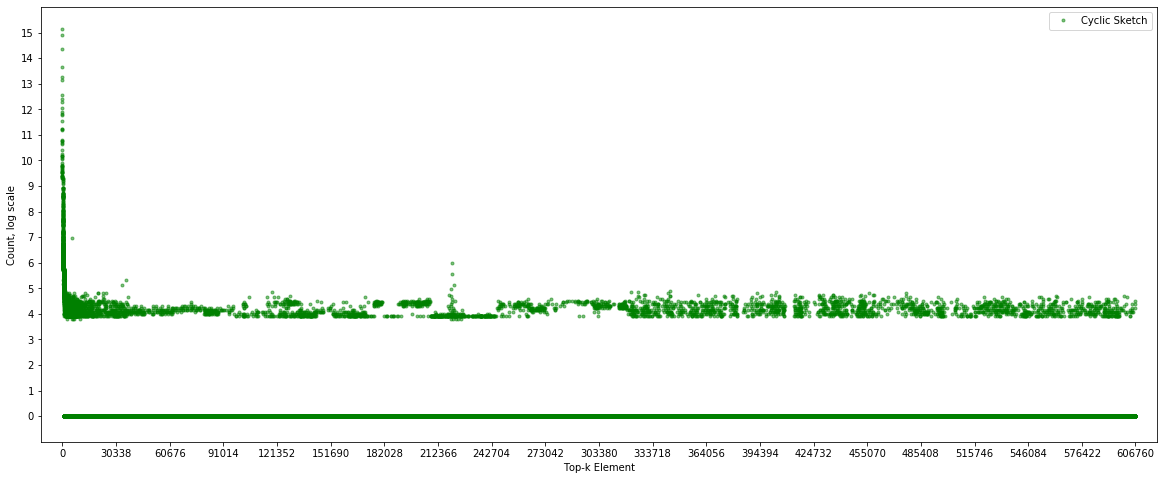

In [12]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof

dataset='kosarak'
# =============================dataset path and file=============================
filename='kosarak.dat'
filepath=r"..\..\dataset\kosarak"
gr_file_name='kosarak_ground_truth.csv'
src_data=os.path.join(filepath,filename)
    # file
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth file

# =============================Initialize=============================
w=256
d=128
size=5888
topk=1024
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)

# =============================Stream processing=============================
start=time.time()
with open(src_data,'r') as file:
    while True:
        e=file.readline().strip('\n')
        if not e:
            print('EOF')
            break
        else:
            #item_count-=1
            item=DS.Tail(e,1)
            if Top_dict.get(item.ID):
                # e in Top
                Top_dict[item.ID]+=1
            else:
                if len(Top_dict)<TC.size:
                    Top_dict[item.ID]=1
                else:
                    hll.add(item.ID)
                    TF.UpdateSk(item,Sk_head,Sketch)
        if TC.e_max.count>e_min.count:
            min_ele = min(Top_dict, key=Top_dict.get)
                # 找dict中的最小key元素
            e_min=DS.Tail(min_ele,Top_dict[min_ele])
            TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))

'''

# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\add_t\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_kosarak'+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_kosarak'+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))  

In [13]:
result_5188=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result_5188

,Element,Count
0,3,36133
1,6,30225
2,6 3,21139
3,11 6,12769
4,1,9766
...,...,...
5883,16926,15
5884,1204 1205 1206 1207 1208 1209 1210 1211 1212 1...,15
5885,6 762 504 14 77 4597 11079,15
5886,11 4 6 3223 534 740,15
